# Titanic Kaggle competition 


## Objective 
---------
    Predicting survival passengers 

## Data
---------
    <b>Description</b> : The data has been split into two groups 
    - training set (train.csv) 
    - test set (test.csv)
    
    <b>shape </b> : 10 columns 
        survival	Survival	0 = No, 1 = Yes
        pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
        sex	Sex	
        Age	Age in years	
        sibsp	number of siblings / spouses aboard the Titanic	
        parch	number of parents / children aboard the Titanic	
        ticket	Ticket number	
        fare	Passenger fare	
        cabin	Cabin number	
        embarked	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
## Model 
-----------
    What model I used 
    
    
## Results 
------------
    Results

## Import modules 

In [1]:
import numpy as np 
import pandas as pd 

## Import data 

In [2]:
data = pd.read_csv('Data/train.csv', sep=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('Data/test.csv', sep=',')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data exploration 

In [4]:
print('Number of passengers :', len(data), ' Missing values (total) : ', data.isnull().sum().sum())

Number of passengers : 891  Missing values (total) :  866


In [5]:
data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']].describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [40]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [41]:
data.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [42]:
data.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [43]:
data.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [72]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## Output : categorical [0; 1]
## Inputs 

# Pclass : categorical [1; 2; 3]

# Sex : categorical ['male'; 'female']

# Age : continuous float [0 - 80]
data.Age.max()

# SibSp : continous integer [0:8]
data.SibSp.unique()

# Parch : continuous integer [0:6]
data.Parch.unique()

# Fare : continous float 
data.groupby('Pclass')['Fare'].aggregate(['min', 'max'])

# Embarked : Categorical ['C', 'S', 'Q']



,min,max
Pclass,,
1,0.0,512.3292
2,0.0,73.5000
3,0.0,69.5500


Text(0.5, 0, 'Number of parents / children aboard the Titanic categories')

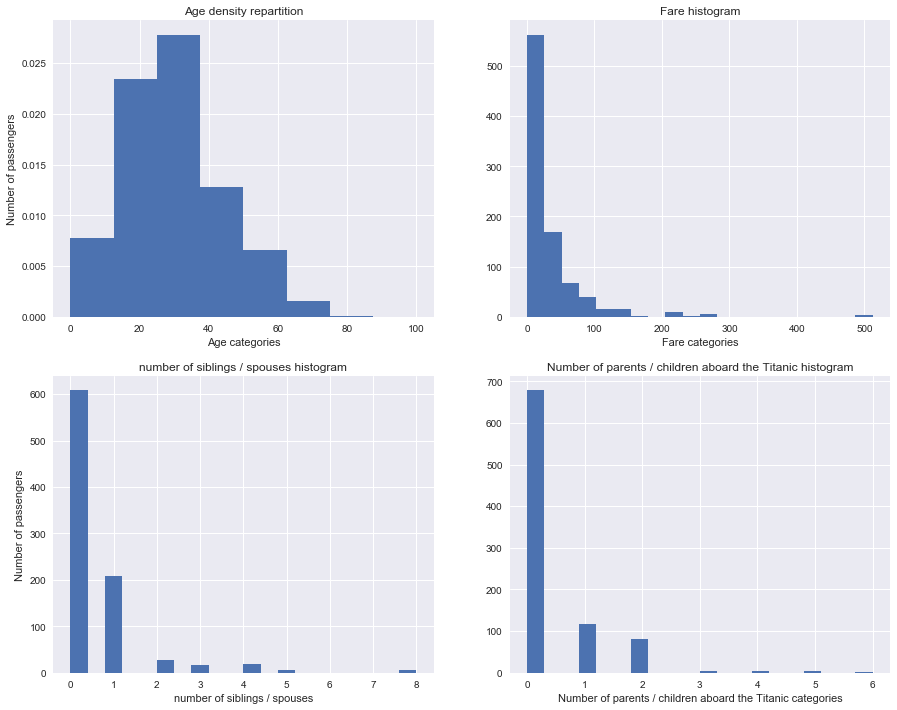

In [7]:
# Exploring continuous variables 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('seaborn')
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Age breakdown
ax[(0, 0)].hist(data.Age.dropna(), bins=8, density=True, range=(0, 100))
ax[(0, 0)].set_title('Age density repartition')
ax[(0, 0)].set_xlabel('Age categories')
ax[(0, 0)].set_ylabel('Number of passengers')

# Fare Histogram
ax[(0, 1)].hist(data.Fare.dropna(), bins=20)
ax[(0, 1)].set_title('Fare histogram')
ax[(0, 1)].set_xlabel('Fare categories')

# Number of siblings / spouses repartition
ax[(1, 0)].hist(data.SibSp.dropna(), bins=20)
ax[(1, 0)].set_title('number of siblings / spouses histogram')
ax[(1, 0)].set_xlabel('number of siblings / spouses')
ax[(1, 0)].set_ylabel('Number of passengers')

# Number of parents / children aboard
ax[(1, 1)].hist(data.Parch.dropna(), bins=20)
ax[(1, 1)].set_title('Number of parents / children aboard the Titanic histogram')
ax[(1, 1)].set_xlabel('Number of parents / children aboard the Titanic categories')




- Quasi-normal distribution of ages 
- left skewed histograms for Parch, SibSp and fare variables


In [31]:
# Hypothesis : Majority of children have survived  

# Creation of a column with three age categories 
data.Age.fillna(0) 

def age_categories(x) :
    if x == 0 :
        cat = 0
    elif x <= 18 :
        cat = 1 
    elif x <= 60 : 
        cat = 2 
    else : 
        cat = 3
    return cat 
        
data['Age_category'] = data.Age.map(age_categories)
test_data['Age_category'] = test_data.Age.map(age_categories)


In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2,0


In [9]:
data.groupby('Age_category')['Survived'].mean()

Age_category
1    0.503597
2    0.388788
3    0.286432
Name: Survived, dtype: float64

Half children have survived 

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

data_t = data.dropna()
X = data_t[['Age', 'Fare', 'SibSp', 'Parch']].values
y = data_t['Survived'].values

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2) 
# apply feature selection
X_selected = fs.fit_transform(X, y)


dfscores = pd.DataFrame(fs.scores_, index = ['Age', 'Fare', 'SibSp', 'Parch'])
dfscores

,0
Age,12.491639
Fare,3.321597
SibSp,2.070439
Parch,0.100716


Age is more relevant to explain survivals for the numeric inputs

In [11]:
# Categorical features 

In [12]:
# Survivals by sex 
print(data.groupby('Sex')['Survived'].mean())

# Number of passengers by sex
print(data.Sex.value_counts())

# Survivals by class and sex
data.pivot_table('Survived', index='Sex', columns='Pclass')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Most females have survived (almost 75 %)

Sex is a great feature ! The comination of sex and class are significant too ! 

In [13]:
# Pclass feature
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Most of first class passengers have survived 

In [14]:
# Embarked location
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

A priori, Sex and Pclass are the most useful features

In [15]:
from sklearn.feature_selection import chi2

data_t = data[['Survived', 'Embarked', 'Sex', 'Pclass', 'Age_category']].dropna()
X = pd.get_dummies(data_t[['Embarked', 'Sex', 'Pclass', 'Age_category']])

                   
y = data_t['Survived'].values

# define feature selection
fs = SelectKBest(score_func=chi2, k=2) 
# apply feature selection
X_selected = fs.fit_transform(X, y)


dfscores = pd.DataFrame(fs.scores_, index = X.columns)
dfscores

,0
Pclass,30.135266
Age_category,3.081532
Embarked_C,20.828558
Embarked_Q,0.016705
Embarked_S,5.643887
Sex_female,169.242305
Sex_male,91.514037


Sex is clearly the most significant feature for the modelisation. Pclass and Embarked could be helpfull. 

## Missing and aberrant values

In [16]:
# Missing values 
(data.isnull()).sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature selection & Feature engineering 

In [16]:
### Filtering method

In [ ]:
### Wrapper Method

In [17]:
### Feature importance through the ML algorithm

In [18]:
### Creation of a feature with family number 

data['Family'] = data['SibSp'] + data['Parch']

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

data_t = data.dropna()
X = data_t[['Age', 'Fare', 'SibSp', 'Parch', 'Family']].values
y = data_t['Survived'].values

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2) 
# apply feature selection
X_selected = fs.fit_transform(X, y)


dfscores = pd.DataFrame(fs.scores_, index = ['Age', 'Fare', 'SibSp', 'Parch', 'Family'])
dfscores

,0
Age,12.491639
Fare,3.321597
SibSp,2.070439
Parch,0.100716
Family,1.100257


## Modelisation 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Array generation for training the model
X = pd.get_dummies(data[['Pclass', 'Sex', 'Embarked', 'Parch', 'Age_category']]).values # Transforms the categorical variables into integer values
X_test = pd.get_dummies(test_data[['Pclass', 'Sex', 'Embarked', 'Parch', 'Age_category']]).values
y = data['Survived'].values

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf = clf.fit(X, y)

# Score 
print(clf.score(X, y))

# Feature importance 
print(clf.feature_importances_)

# Predict 
predictions = clf.predict(X_test)

# Saving results 
results = pd.DataFrame({'PassengerId' : test_data.PassengerId, 
             'Survived' : predictions })
results.to_csv('Data/my_submission.csv', index=False)





0.8282828282828283
[0.19562544 0.07330113 0.0619106  0.30840148 0.29600247 0.02795357
 0.01256546 0.02423986]


## Model selection 

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

X = pd.get_dummies(data[['Pclass', 'Sex', 'Embarked', 'Parch', 'Age_category']]).values # Transforms the categorical variables into integer values
X_test = pd.get_dummies(test_data[['Pclass', 'Sex', 'Embarked', 'Parch', 'Age_category']]).values
y = data['Survived'].values

clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GaussianNB()


eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    


Accuracy: 0.79 (+/- 0.02) [Logistic Regression]
Accuracy: 0.79 (+/- 0.02) [Random Forest]
Accuracy: 0.78 (+/- 0.01) [naive Bayes]
Accuracy: 0.79 (+/- 0.02) [Ensemble]


## To do :

- Further exploration : correlation between variables / Volume of missing values / aberrant values 
- Feature selection (what feature I need to keep for my model ? )
- Feature engineering ( what feature I need to construct to improve my model ? )
- Model selection (Why this model ? What tests have been done ? )
- Model validation ( https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

Next day : 
- working with categorical data
- Wrapper and embedded method to select features 
- Feature engineering (other ideas to create relevant features ?)
- Model tuning and validation (hyperparameters https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb ,  https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb , https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.08-Random-Forests.ipynb ) 
